<a href="https://colab.research.google.com/github/Hammadtahir7/Card-Fraud-Detection/blob/master/CCFD_ECD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ECDNM.csv to ECDNM.csv


In [87]:
import io
import pandas as pd
df2 = pd.read_csv(io.BytesIO(uploaded['ECDNM.csv']),header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,76866.0,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,-0.079491,-0.304453,0.055638,0.627844,0.968874,-0.435499,1.012926,0.445284,-0.049622,-0.388480,-0.201395,-0.033053,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,1.78,0.0
1,76868.0,1.254775,0.375340,0.311959,0.691077,-0.343494,-1.065252,0.110222,-0.222721,-0.017278,-0.292722,-0.010006,0.409479,0.553968,-0.352550,1.058069,0.463211,-0.023915,-0.339299,-0.200980,-0.057911,-0.283275,-0.803506,0.124643,0.354395,0.226835,0.093208,-0.021100,0.031686,2.69,0.0
2,76870.0,-1.050697,1.500753,0.846326,-0.282956,0.059866,-0.561182,0.484517,0.181547,0.081544,0.613903,1.100861,0.042911,-0.823641,-0.281402,0.364323,0.655438,-0.337470,0.528699,0.240959,0.457988,-0.335560,-0.780232,-0.027029,-0.090180,-0.022896,0.091830,0.547241,0.278780,1.29,0.0
3,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,-0.127708,-0.006219,-0.268366,0.576178,0.725978,0.244139,0.839535,0.014384,-0.467398,-0.241561,-0.375801,-0.098066,0.035687,0.186705,-0.107300,0.417887,0.712330,-0.330843,0.018576,0.021871,3.99,0.0
4,76870.0,1.261137,0.304662,0.527018,0.612765,-0.411488,-0.972770,0.112838,-0.248052,-0.068454,-0.087776,-0.091455,0.767559,1.067270,0.089504,0.949708,0.268773,-0.467480,-0.633160,-0.122404,-0.044989,-0.249081,-0.683649,0.126936,0.395307,0.243448,0.092344,-0.024149,0.020589,1.79,0.0


In [88]:
df2[df2.columns[30]].value_counts()

0.0    4920
1.0     492
Name: 30, dtype: int64

In [0]:
features =df2.drop(df2.columns[30],axis=1)
labels=df2[df2.columns[30]]


In [90]:
import numpy as np
unique_elements, counts_elements = np.unique(labels, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[   0    1]
 [4920  492]]


In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
features = scaler.fit_transform(features)
print(features[0])

X_train, X_test, y_train, y_test=train_test_split(features,labels,test_size=0.2, random_state=42)

#X_train=X_train.astype('float32')
#X_test=X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[-0.17173215  0.56001562 -0.14030157  0.2370538   0.10668661 -0.06840585
 -0.61719593  0.24481938 -0.14918819  0.09220449  0.0869663  -0.20705767
  0.51666443  0.8467141   0.05488739  1.07935052  0.41413988  0.17997006
 -0.13385379 -0.27718361 -0.01870894 -0.24341216 -0.94326976  0.20064436
  0.61676271  0.45192846  0.14968736 -0.05228983  0.09114222 -0.32253221]
(4329, 30)
(1083, 30)
(4329,)
(1083,)


In [92]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[  0   1]
 [990  93]]


In [93]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()

In [0]:
from sklearn import svm
model_svm = svm.SVC(probability=True)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(1,30)))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.layers import Conv2D, Flatten
#create model
model_2dcnn = Sequential()
#add model layers
model_2dcnn.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(5,6,1)))
model_2dcnn.add(Conv2D(32, kernel_size=3, activation='relu'))
model_2dcnn.add(Flatten())
model_2dcnn.add(Dense(1, activation='sigmoid'))
model_2dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model_ann=Sequential()
model_ann.add(Dense(200,input_shape=(30,),activation='relu'))
model_ann.add(Dense(1,activation='sigmoid'))
model_ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

model_1dcnn = Sequential()
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1,30)))
model_1dcnn.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model_1dcnn.add(Dropout(0.5))
model_1dcnn.add(MaxPooling1D(pool_size=1))
model_1dcnn.add(Flatten())
model_1dcnn.add(Dense(100, activation='relu'))
model_1dcnn.add(Dense(1, activation='sigmoid'))
model_1dcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [100]:
model_lstm.fit(X_train.reshape(4329,1,30), y_train, validation_data=(X_test.reshape(1083,1,30), y_test), epochs=10)

Train on 4329 samples, validate on 1083 samples
Epoch 1/10
4329/4329 [==============================] - 3s 677us/step - loss: 0.4209 - acc: 0.9494 - val_loss: 0.1809 - val_acc: 0.9861
Epoch 2/10
4329/4329 [==============================] - 1s 119us/step - loss: 0.1080 - acc: 0.9838 - val_loss: 0.0726 - val_acc: 0.9861
Epoch 3/10
4329/4329 [==============================] - 0s 107us/step - loss: 0.0614 - acc: 0.9864 - val_loss: 0.0628 - val_acc: 0.9861
Epoch 4/10
4329/4329 [==============================] - 1s 116us/step - loss: 0.0507 - acc: 0.9880 - val_loss: 0.0591 - val_acc: 0.9889
Epoch 5/10
4329/4329 [==============================] - 0s 113us/step - loss: 0.0458 - acc: 0.9889 - val_loss: 0.0583 - val_acc: 0.9889
Epoch 6/10
4329/4329 [==============================] - 0s 114us/step - loss: 0.0426 - acc: 0.9901 - val_loss: 0.0581 - val_acc: 0.9889
Epoch 7/10
4329/4329 [==============================] - 0s 104us/step - loss: 0.0402 - acc: 0.9896 - val_loss: 0.0581 - val_acc: 0.9889


In [101]:
model_2dcnn.fit(X_train.reshape(4329,5,6,1), y_train, validation_data=(X_test.reshape(1083,5,6,1), y_test), epochs=10)

Train on 4329 samples, validate on 1083 samples
Epoch 1/10
4329/4329 [==============================] - 3s 583us/step - loss: 0.1556 - acc: 0.9697 - val_loss: 0.0705 - val_acc: 0.9861
Epoch 2/10
4329/4329 [==============================] - 0s 103us/step - loss: 0.0566 - acc: 0.9871 - val_loss: 0.0585 - val_acc: 0.9880
Epoch 3/10
4329/4329 [==============================] - 0s 103us/step - loss: 0.0482 - acc: 0.9880 - val_loss: 0.0550 - val_acc: 0.9889
Epoch 4/10
4329/4329 [==============================] - 0s 100us/step - loss: 0.0423 - acc: 0.9898 - val_loss: 0.0568 - val_acc: 0.9908
Epoch 5/10
4329/4329 [==============================] - 0s 103us/step - loss: 0.0421 - acc: 0.9896 - val_loss: 0.0661 - val_acc: 0.9834
Epoch 6/10
4329/4329 [==============================] - 0s 100us/step - loss: 0.0439 - acc: 0.9880 - val_loss: 0.0509 - val_acc: 0.9898
Epoch 7/10
4329/4329 [==============================] - 0s 97us/step - loss: 0.0376 - acc: 0.9915 - val_loss: 0.0505 - val_acc: 0.9917
E

In [102]:
model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 4329 samples, validate on 1083 samples
Epoch 1/10
4329/4329 [==============================] - 2s 517us/step - loss: 0.2105 - acc: 0.9319 - val_loss: 0.0803 - val_acc: 0.9852
Epoch 2/10
4329/4329 [==============================] - 0s 52us/step - loss: 0.0573 - acc: 0.9873 - val_loss: 0.0637 - val_acc: 0.9871
Epoch 3/10
4329/4329 [==============================] - 0s 52us/step - loss: 0.0470 - acc: 0.9882 - val_loss: 0.0606 - val_acc: 0.9898
Epoch 4/10
4329/4329 [==============================] - 0s 53us/step - loss: 0.0424 - acc: 0.9896 - val_loss: 0.0595 - val_acc: 0.9908
Epoch 5/10
4329/4329 [==============================] - 0s 54us/step - loss: 0.0393 - acc: 0.9896 - val_loss: 0.0600 - val_acc: 0.9917
Epoch 6/10
4329/4329 [==============================] - 0s 54us/step - loss: 0.0371 - acc: 0.9910 - val_loss: 0.0591 - val_acc: 0.9917
Epoch 7/10
4329/4329 [==============================] - 0s 51us/step - loss: 0.0360 - acc: 0.9903 - val_loss: 0.0589 - val_acc: 0.9917
Epoch 

In [103]:
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [104]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
model_1dcnn.fit(X_train.reshape(4329,1,30), y_train, validation_data=(X_test.reshape(1083,1,30), y_test), epochs=10)

Train on 4329 samples, validate on 1083 samples
Epoch 1/10
4329/4329 [==============================] - 3s 600us/step - loss: 0.1716 - acc: 0.9640 - val_loss: 0.0788 - val_acc: 0.9861
Epoch 2/10
4329/4329 [==============================] - 0s 75us/step - loss: 0.0594 - acc: 0.9868 - val_loss: 0.0802 - val_acc: 0.9880
Epoch 3/10
4329/4329 [==============================] - 0s 73us/step - loss: 0.0468 - acc: 0.9887 - val_loss: 0.0757 - val_acc: 0.9889
Epoch 4/10
4329/4329 [==============================] - 0s 70us/step - loss: 0.0456 - acc: 0.9884 - val_loss: 0.0763 - val_acc: 0.9889
Epoch 5/10
4329/4329 [==============================] - 0s 70us/step - loss: 0.0393 - acc: 0.9915 - val_loss: 0.0808 - val_acc: 0.9880
Epoch 6/10
4329/4329 [==============================] - 0s 71us/step - loss: 0.0397 - acc: 0.9910 - val_loss: 0.0739 - val_acc: 0.9889
Epoch 7/10
4329/4329 [==============================] - 0s 75us/step - loss: 0.0358 - acc: 0.9919 - val_loss: 0.0735 - val_acc: 0.9898
Epoch 

In [0]:
y_pred_svm=model_svm.predict(X_test)
y_pred_rf=model_rf.predict(X_test)
y_pred_1dcnn=model_1dcnn.predict_classes(X_test.reshape(1083,1,30))
y_pred_2dcnn=model_2dcnn.predict_classes(X_test.reshape(1083,5,6,1))
y_pred_lstm=model_lstm.predict_classes(X_test.reshape(1083,1,30))
y_pred_ann=model_ann.predict_classes(X_test)

In [107]:
unique_elements, counts_elements = np.unique(y_pred_2dcnn, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)).astype(int))

Frequency of unique values of the said array:
[[  0   1]
 [999  84]]


In [108]:
y_pred=model_lstm.predict_classes(X_test.reshape(1083,1,30))
y_pred=np.append(y_pred,model_2dcnn.predict_classes(X_test.reshape(1083,5,6,1)),axis=1)
y_pred=np.append(y_pred,model_ann.predict_classes(X_test),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X_test).reshape(1083,1),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X_test).reshape(1083,1),axis=1)
y_pred=np.append(y_pred,model_1dcnn.predict_classes(X_test.reshape(1083,1,30)),axis=1)
print(y_pred.shape)

(1083, 6)


In [0]:
header=['LSTM','2DCNN','ANN','SVM','RF','1DCNN']

In [110]:
from sklearn import metrics

for x in range (len(y_pred[0])):
  print(header[x])
  print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y_test, y_pred[:,x])))
  print("Precision: "+"{:.2%}".format(metrics.precision_score(y_test, y_pred[:,x])))
  print("Recall: "+"{:.2%}".format(metrics.recall_score(y_test, y_pred[:,x])))
  print("F1: "+"{:.2%}".format(metrics.f1_score(y_test,y_pred[:,x])))
  print(metrics.confusion_matrix(y_test,y_pred[:,x]))
  print("-----------")

LSTM
Accuracy: 98.98%
Precision: 97.67%
Recall: 90.32%
F1: 93.85%
[[988   2]
 [  9  84]]
-----------
2DCNN
Accuracy: 99.17%
Precision: 100.00%
Recall: 90.32%
F1: 94.92%
[[990   0]
 [  9  84]]
-----------
ANN
Accuracy: 99.17%
Precision: 100.00%
Recall: 90.32%
F1: 94.92%
[[990   0]
 [  9  84]]
-----------
SVM
Accuracy: 98.80%
Precision: 97.62%
Recall: 88.17%
F1: 92.66%
[[988   2]
 [ 11  82]]
-----------
RF
Accuracy: 99.17%
Precision: 98.84%
Recall: 91.40%
F1: 94.97%
[[989   1]
 [  8  85]]
-----------
1DCNN
Accuracy: 98.98%
Precision: 97.67%
Recall: 90.32%
F1: 93.85%
[[988   2]
 [  9  84]]
-----------


In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

lr_probs_svm = model_svm.predict_proba(X_test)[:,1]
lr_probs_rf =model_rf.predict_proba(X_test)[:,1]
lr_probs_lstm=model_lstm.predict_proba(X_test.reshape(1083,1,30)).reshape(1083)
lr_probs_1dcnn=model_1dcnn.predict_proba(X_test.reshape(1083,1,30)).reshape(1083)
lr_probs_2dcnn=model_2dcnn.predict_proba(X_test.reshape(1083,5,6,1)).reshape(1083)
lr_probs_ann=model_ann.predict_proba(X_test).reshape(1083)


In [112]:
lr_precision_svm, lr_recall_svm, _ = precision_recall_curve(y_test, lr_probs_svm)
lr_f1_svm, lr_auc_svm = f1_score(y_test, y_pred_svm), auc(lr_recall_svm, lr_precision_svm)

lr_precision_rf, lr_recall_rf, _ = precision_recall_curve(y_test, lr_probs_rf)
lr_f1_rf, lr_auc_rf = f1_score(y_test, y_pred_rf), auc(lr_recall_rf, lr_precision_rf)

lr_precision_lstm, lr_recall_lstm, _ = precision_recall_curve(y_test, lr_probs_lstm)
lr_f1_lstm, lr_auc_lstm = f1_score(y_test, y_pred_lstm), auc(lr_recall_lstm, lr_precision_lstm)

lr_precision_1dcnn, lr_recall_1dcnn, _ = precision_recall_curve(y_test, lr_probs_1dcnn)
lr_f1_1dcnn, lr_auc_1dcnn = f1_score(y_test, y_pred_1dcnn), auc(lr_recall_1dcnn, lr_precision_1dcnn)

lr_precision_2dcnn, lr_recall_2dcnn, _ = precision_recall_curve(y_test, lr_probs_2dcnn)
lr_f1_2dcnn, lr_auc_2dcnn = f1_score(y_test, y_pred_2dcnn), auc(lr_recall_2dcnn, lr_precision_2dcnn)

lr_precision_ann, lr_recall_ann, _ = precision_recall_curve(y_test, lr_probs_ann)
lr_f1_ann, lr_auc_ann = f1_score(y_test, y_pred_ann), auc(lr_recall_ann, lr_precision_ann)

print("{:.2%}".format(lr_f1_ann))
print("{:.2%}".format(lr_auc_ann))

94.92%
93.23%


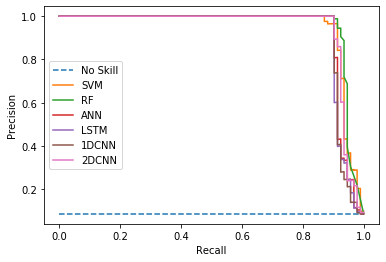

<Figure size 2880x2880 with 0 Axes>

In [114]:
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall_svm, lr_precision_svm, 'C1', label='SVM')
pyplot.plot(lr_recall_rf, lr_precision_rf, 'C2', label='RF')
pyplot.plot(lr_recall_ann, lr_precision_ann, 'C3', label='ANN')
pyplot.plot(lr_recall_lstm, lr_precision_lstm, 'C4', label='LSTM')
pyplot.plot(lr_recall_1dcnn, lr_precision_1dcnn, 'C5', label='1DCNN')
pyplot.plot(lr_recall_2dcnn, lr_precision_2dcnn, 'C6', label='2DCNN')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
pyplot.figure(figsize=(40,40))
# show the plot
pyplot.show()


In [43]:
y_pred=model_lstm.predict_classes(X_test.reshape(1083,1,30))
y_pred=np.append(y_pred,model_2dcnn.predict_classes(X_test.reshape(1083,5,6,1)),axis=1)
y_pred=np.append(y_pred,model_ann.predict_classes(X_test),axis=1)
y_pred=np.append(y_pred,model_svm.predict(X_test).reshape(1083,1),axis=1)
y_pred=np.append(y_pred,model_rf.predict(X_test).reshape(1083,1),axis=1)
print(y_pred.shape)

(1083, 5)


In [0]:
import statistics
y=[]
for rows in y_pred:
  y=np.append(y,statistics.mode(rows))

In [45]:
y_pred=y.reshape(1083,1)
print(y_pred.shape)

(1083, 1)


In [46]:
from sklearn import metrics
print("Accuracy: "+"{:.2%}".format(metrics.accuracy_score(y_test, y_pred)));
print("Precision: "+"{:.2%}".format(metrics.precision_score(y_test, y_pred)));
print("Recall: "+"{:.2%}".format(metrics.recall_score(y_test, y_pred)));
print("F1: "+"{:.2%}".format(metrics.f1_score(y_test,y_pred)));
print(metrics.confusion_matrix(y_test,y_pred));

Accuracy: 99.08%
Precision: 98.82%
Recall: 90.32%
F1: 94.38%
[[989   1]
 [  9  84]]
